50.9121609636 50.9121609636
Accuracy 0.989701377908
[ 940.32044343  951.01391066  951.02392327  946.72851368  937.73719011
  940.89116218  963.38949633  968.30568772  977.22692302  970.96904192]


<IPython.core.display.Javascript object>


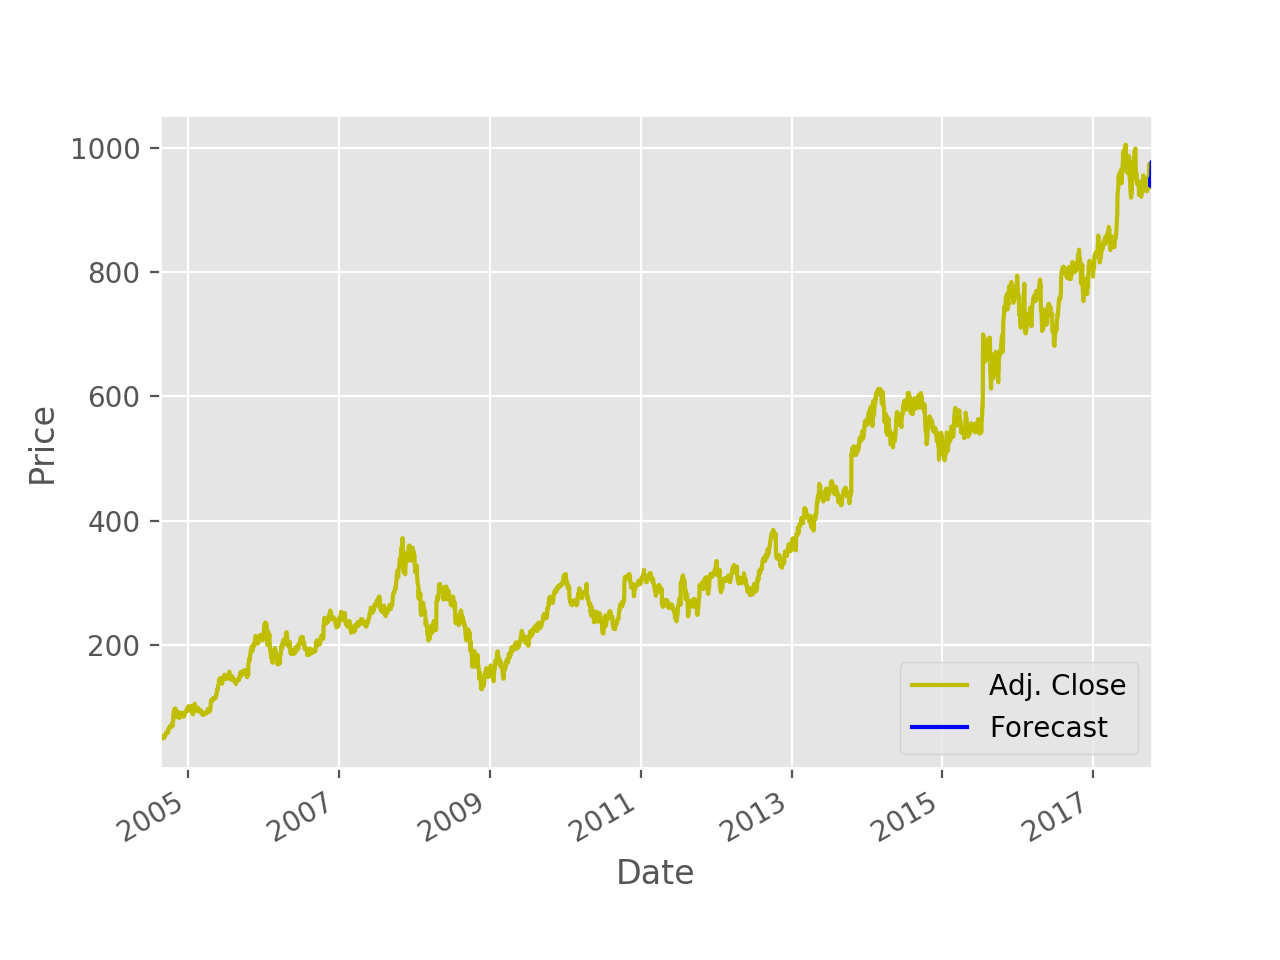

In [15]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

%matplotlib notebook
##Github Issues Resolved
import warnings

warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
warnings.filterwarnings(action="ignore", module="scipy", message="^This module")



df = quandl.get('WIKI/GOOGL')

#print(df.tail())

df = df[['Adj. Close']]
#df = df[['Adj. Close']]

forecast_col = 'Adj. Close' #Label variable

#df.fillna(-99999,inplace=True)

forecast_out = 10
#print(df.tail())
df['label'] = df[forecast_col].shift(-forecast_out)
print(df['label'][0],df['Adj. Close'][10])
df.dropna(inplace=True)
#print(df.tail())

##Make X,Y and Split Data
X = np.array(df.drop(['label'],1)) #X = adj. close 10/17/2017
y = np.array(df['label']) # y = label 10/17/2017

X = preprocessing.scale(X) #Is not used for high-performance applications
X_lately = X[-forecast_out:]
#X = X[:-forecast_out:] DON'T DO THIS
X = X[:-forecast_out]
y = y[:-forecast_out]

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

##Initialize a classifier and fit(train) data
clf = LinearRegression(n_jobs = -1) 
#clf = svm.SVR(kernel="poly") Default is linear(citation needed)
clf.fit(X_train,y_train)


##Printing, Testing

accuracy = clf.score(X_test,y_test)
print("Accuracy" , accuracy)
forecast_set = clf.predict(X_lately)
print(forecast_set)
#print(forecast_set)
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
	next_date = datetime.datetime.fromtimestamp(next_unix)
	next_unix += one_day
	df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]


df['Adj. Close'].plot(color='y')
df['Forecast'].plot(color='b')
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [7]:
a = [1,2,3,4,5,6,7,8,9,10]
print(a[-2:])

[9, 10]


In [8]:
print(forecast_set)

[ 940.39624893  951.09382595  951.10384241  946.80678198  937.8120028
  940.96718703  963.47416789  968.39224871  977.31691268  971.0566265 ]
